In [ ]:
# tool calling



In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=200,
)

In [3]:
llm.invoke("How is the weather in chennai today?")

AIMessage(content='I am sorry, but I cannot provide real-time weather updates. My knowledge base is not connected to live data feeds.\n\nTo get the most accurate and up-to-date weather information for Chennai, I recommend checking a reliable weather source such as:\n\n*   **Weather websites:** AccuWeather, The Weather Channel, BBC Weather, etc.\n*   **Weather apps:** Most smartphones come with a built-in weather app, or you can download one from your app store.\n*   **News websites:** Many local and international news outlets provide weather forecasts.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--70d7c15d-c2f5-4e34-ba56-5b99b885ba0b-0', usage_metadata={'input_tokens': 10, 'output_tokens': 117, 'total_tokens': 127, 'input_token_details': {'cache_read': 0}})

In [ ]:
from langchain_core.tools import tool

@tool
def get_weather(location: str):
    """Call to get the current weather."""
    if location.lower() in ["chennai"]:
        return "It's 15 degrees Celsius and cloudy."
    else:
        return "It's 32 degrees Celsius and sunny."
    

@tool
def check_seating_availability(location: str, seating_type: str):
    """Call to check seating availability."""
    if location.lower() == "chennai" and seating_type.lower() == "outdoor":
        return "Yes, we still have seats available outdoors."
    elif location.lower() == "chennai" and seating_type.lower() == "indoor":
        return "Yes, we have indoor seating available."
    else:
        return "Sorry, seating information for this location is unavailable."

tools = [get_weather, check_seating_availability, ]



@tool
def get_weather_info(location:str ):
    import requests
    url = f'https://getweather?q={location}'
    resp = requests.post(url)

    return resp.content



In [16]:
get_weather.invoke({'location': 'chennai'})

"It's 15 degrees Celsius and cloudy."

In [27]:
llm_with_tools = llm.bind_tools(tools)

In [6]:
result = llm_with_tools.invoke("How will the weather be in chennai today?")
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--0260405c-7438-476b-aebb-83c4e7d8d16a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': 'e35b8860-1315-487f-b2ba-b3de88cad065', 'type': 'tool_call'}], usage_metadata={'input_tokens': 108, 'output_tokens': 16, 'total_tokens': 124, 'input_token_details': {'cache_read': 0}})

In [7]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'location': 'chennai'},
  'id': 'e35b8860-1315-487f-b2ba-b3de88cad065',
  'type': 'tool_call'}]

In [8]:
result = llm_with_tools.invoke(
    "How will the weather be in chennai today? Do you still have seats outdoor available?"
)
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--b9ada94b-8fc0-4773-9b6c-cbf7c708c984-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '9a22a149-df47-4386-95b7-985584acf437', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': '457b2c5f-5d8c-40c4-a964-8d8014a6697c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}})

In [9]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'location': 'chennai'},
  'id': '9a22a149-df47-4386-95b7-985584acf437',
  'type': 'tool_call'},
 {'name': 'check_seating_availability',
  'args': {'seating_type': 'outdoor', 'location': 'chennai'},
  'id': '457b2c5f-5d8c-40c4-a964-8d8014a6697c',
  'type': 'tool_call'}]

In [10]:
from langchain_core.messages import HumanMessage, ToolMessage


messages = [
    HumanMessage(
        "How will the weather be in chennai today? Do you still have seats outdoor available?"
    )
    ]

llm_output = llm_with_tools.invoke(messages)

messages.append(llm_output)



In [11]:
messages

[HumanMessage(content='How will the weather be in chennai today? Do you still have seats outdoor available?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--6ff80f26-4e05-49f1-9233-64462e51388a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '00858038-2c95-438a-ae8c-d852021ce939', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': '8251153f-c6ba-4342-b0bf-18b40d4fd337', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}})]

In [18]:
tool_mapping = {
    "get_weather": get_weather,
    "check_seating_availability": check_seating_availability,
}

In [19]:
for tool_call in llm_output.tool_calls:
    tool = tool_mapping[tool_call['name'].lower()]
    tool_output = tool.invoke(tool_call['args'])
    messages.append(ToolMessage(tool_output, tool_call_id=tool_call['id']))


In [20]:
messages

[HumanMessage(content='How will the weather be in chennai today? Do you still have seats outdoor available?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--6ff80f26-4e05-49f1-9233-64462e51388a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '00858038-2c95-438a-ae8c-d852021ce939', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': '8251153f-c6ba-4342-b0bf-18b40d4fd337', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(conte

In [28]:
llm_with_tools.invoke(messages)

AIMessage(content='The weather in Chennai today is 15 degrees Celsius and cloudy. Yes, we still have outdoor seats available.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--9199f4c8-dc21-48dd-be91-07df70c55bcc-0', usage_metadata={'input_tokens': 207, 'output_tokens': 23, 'total_tokens': 230, 'input_token_details': {'cache_read': 0}})

---

AIMessage(content='The weather in Chennai today will be 15 degrees Celsius and cloudy. Yes, we still have seats available outdoors.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--39c83a5b-7a73-45d9-9a10-4529a18681ae-0', usage_metadata={'input_tokens': 207, 'output_tokens': 24, 'total_tokens': 231, 'input_token_details': {'cache_read': 0}})

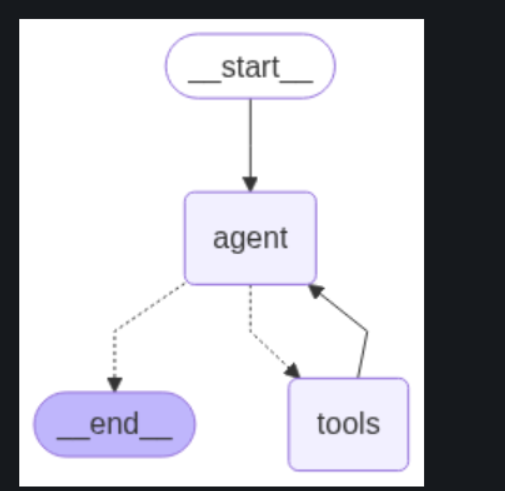

In [ ]:
from langgraph.graph import END, START, StateGraph, MessagesState
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal


from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)


@tool
def get_weather(location: str):
    """Call to get the current weather."""
    if location.lower() in ["chennai"]:
        return "It's 15 degrees Celsius and cloudy."
    else:
        return "It's 32 degrees Celsius and sunny."




In [25]:
get_weather.invoke(input={"location": "chennai"})

"It's 15 degrees Celsius and cloudy."

In [29]:
tools = [get_weather]

model = llm.bind_tools(tools)

In [30]:
model.invoke("hello")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--05069ab4-46b3-4ad3-a0db-3deec24d77c8-0', usage_metadata={'input_tokens': 41, 'output_tokens': 9, 'total_tokens': 50, 'input_token_details': {'cache_read': 0}})

In [31]:
model.invoke("How is the weather in chennai?")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--3132ccc9-fdb4-411d-b751-f8d74963db9a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '036b89ae-ecb1-4385-8e56-4979a5e81377', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}})

In [35]:
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}


def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [33]:
workflow = StateGraph(MessagesState)
tool_node = ToolNode(tools)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

In [36]:
workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

In [37]:
graph = workflow.compile()

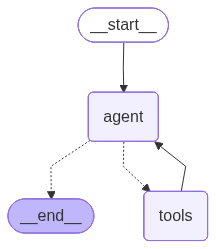

In [38]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
from langchain_core.messages import HumanMessage

messages1 = [HumanMessage(content="Hello, how are you?")]
messages2 = [HumanMessage(content="How is the weather in chennai?")]

In [40]:
graph.invoke({"messages": messages1})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='24d9b53d-d6d5-4573-b2df-3195bec882cf'),
  AIMessage(content="Hello! I'm doing well, thank you for asking. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--200b05d3-56c1-41ac-b1d1-d08f37b4496d-0', usage_metadata={'input_tokens': 46, 'output_tokens': 20, 'total_tokens': 102, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 36}})]}

In [41]:
graph.invoke({"messages": messages2})

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='a58cd30a-7361-4ffa-a8e8-624b37113fb1'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--37fd86a2-5890-4d8c-8600-5e412ea4e5f2-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '609ed68a-e2c3-4a1f-8a27-a95a925057e1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='83162fb0-5983-4027-8d7f-32e0fa4d7595', tool_call_id='609ed68a-e2c3-4a1f-8a27-a95a925057e1'),
  AIMessage(content="It

In [42]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city than?")
        ]
    }
)

{'messages': [HumanMessage(content='What would you recommend to do in that city than?', additional_kwargs={}, response_metadata={}, id='facb7672-fcb0-4d65-882e-e0f883a7f92a'),
  AIMessage(content="I'm sorry, I don't know what city you're referring to! Could you please tell me which city you have in mind?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--739710aa-7053-42c9-a538-959bb4056b56-0', usage_metadata={'input_tokens': 51, 'output_tokens': 30, 'total_tokens': 139, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 58}})]}


### Add Memory to chatbot

In [43]:

from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

In [44]:
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

graph = workflow.compile(checkpointer=checkpointer)

In [45]:
graph.invoke(
    {"messages": [HumanMessage(content="How is the weather in chennai?")]},
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='256d2e92-3197-45cb-8ad1-e22d745d55eb'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--ed2b25e8-0ddd-4716-aa0c-0418ebd319f5-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '8cce3612-6836-4cc7-babe-f8c00855def3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='73590b31-98ec-4d2a-a9ab-a137f2614df0', tool_call_id='8cce3612-6836-4cc7-babe-f8c00855def3'),
  AIMessage(content="It

In [47]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city then? Can you tell me which city I am talking about?")
        ]
    },
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='256d2e92-3197-45cb-8ad1-e22d745d55eb'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--ed2b25e8-0ddd-4716-aa0c-0418ebd319f5-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '8cce3612-6836-4cc7-babe-f8c00855def3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='73590b31-98ec-4d2a-a9ab-a137f2614df0', tool_call_id='8cce3612-6836-4cc7-babe-f8c00855def3'),
  AIMessage(content="It